# Modeling and Simulation 3 - Graph Compression

Graph compression methods aim to reduce the size of a graph while preserving its essential structure and information. Graphs are commonly used to represent relationships between objects, and they can become very large and complex, making them difficult to store and process efficiently. Graph compression methods attempt to address this problem by finding ways to represent the graph using fewer bytes of storage, while still allowing for efficient access and manipulation of the data.

The primary goal of graph compression methods is to reduce the storage space required to represent a graph. This can be important for applications where memory or storage space is limited, such as in mobile devices or embedded systems. Compression can also be useful for transmitting graph data over networks, where reducing the amount of data that needs to be transmitted can lead to faster transfer speeds and lower bandwidth usage.

Another goal of graph compression methods is to improve the performance of graph algorithms. By reducing the size of the graph, it becomes faster and more efficient to perform operations such as graph traversal, shortest path finding, or clustering. This can be particularly important in applications where the graph needs to be processed in real-time, such as in network analysis or recommendation systems.

## The Most Popular Approach - Delta Encoding

Delta encoding or delta compression is a data compression technique that involves encoding the difference between consecutive values instead of encoding each value individually. In other words, it involves storing only the changes or the "delta" between successive values, rather than storing the values themselves.

For example, if we have a sequence of numbers:

*5, 8, 12, 17, 23, 30*

instead of storing each number, we can store the first number, and then store the differences between each subsequent number and the previous one. This would result in the following sequence of delta values: 

*5, 3, 4, 5, 6, 7*

Delta encoding can be useful in situations where the data being compressed has a lot of repetition or small changes between consecutive values. By storing only the changes, it can significantly reduce the amount of data that needs to be transmitted or stored, leading to faster transfer speeds and lower storage requirements. Delta encoding is commonly used in video and audio compression, where successive frames or samples are often very similar to each other. One other high-profile example where delta-encoding is used is [Git](https://teknikaldomain.me/post/how-git-efficiently-transmits-your-changes/).

In graph theory, delta encoding is the most commonly used and most studied method for reducing graph sizes. By storing the graph as an adjacency list, delta encoding can be seamlessly implemented for each list, in order to reduce the total amount of bytes needed to store the graph.

In [21]:
def delta_encode(data):
    compressed = []
    last = 0
    
    # TODO construct the compressed list of elements by appending the deltas between elements

    return compressed

def delta_decode(compressed):
    original_data = []
    last = 0

    # TODO recompose the original data using the list of deltas
        
    return original_data

In [ ]:
data = [1, 3, 5, 7, 9, 7, 7]

compressed = delta_encode(data)
print("Deltas: ")
print(compressed)

decompressed = delta_decode(compressed)
print("Original: ")
print(data)
print("Decompressed: ")
print(decompressed)

## Methods of Storing Uncompressed Graphs

### Adjacency Matrix
An adjacency matrix is a way to represent a graph as a matrix, where the rows and columns of the matrix correspond to the vertices of the graph. An entry in the matrix represents the presence or absence of an edge between two vertices.

In an undirected graph, the adjacency matrix is symmetric, meaning that the entry (i,j) is the same as the entry (j,i). The value of the entry is usually 0 or 1, with 1 indicating the presence of an edge between the corresponding vertices. If the graph is weighted, the entry can also represent the weight of the edge.

In a directed graph, the adjacency matrix is not necessarily symmetric, and the entry (i,j) may not be the same as the entry (j,i). Again, the value of the entry is usually 0 or 1, with 1 indicating the presence of an edge from vertex i to vertex j.

Adjacency matrices are a popular way to represent graphs because they are simple and easy to understand. They are also efficient for certain types of graph algorithms, such as matrix multiplication-based algorithms. However, they can be inefficient for sparse graphs, where there are relatively few edges compared to the total number of possible edges.

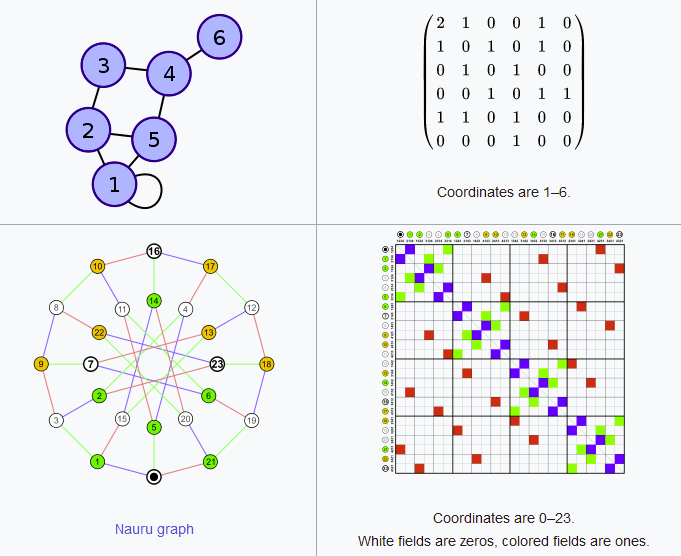

Using the `graph.txt` file found in the lab folder for the current week, load the graph in-memory as an adjacency matrix, and provide an estimate for the memory needed to contain it.

*Hint 1: You can use the numpy `loadtxt` function to read the file.*

*Hint 2: There are no isolated nodes in the graph, all existing nodes have at least an edge attached.*

*Hint 3: As there are no weights attached to the edges, how many bits do we need to encode the values in the matrix?*

In [ ]:
import numpy as np
# TODO read the graph from graph.txt

# TODO create the adjacency matrix for the undirected graph, and fill it with the corresponding values
A = [[]]

# TODO compute the memory needed to hold the matrix
estimate_matrix = 0
print('Memory needed to store the matrix: ' + str(estimate_matrix))

Solution: we would need approximately 1 000 000 bits.

### List of Edges
As you have seen from the previous example, graphs are usually stored as an ungrouped list of edges. Here are some of the advantages of this representation:

- Compact representation: An ungrouped list of edges can be a very compact way of representing a graph, especially for sparse graphs. Storing a list of edges typically requires only a small amount of memory compared to storing a full adjacency matrix or an adjacency list.

- Efficient traversal: For many graph algorithms, it is often more efficient to traverse a graph by iterating over its edges rather than its nodes. An ungrouped list of edges allows for efficient iteration over the edges of the graph.

- Easy to modify: Modifying an ungrouped list of edges is often easier and more efficient than modifying other graph representations. For example, adding or removing an edge from an ungrouped list requires only a simple update to the list, while modifying an adjacency matrix or adjacency list can be more complex and time-consuming.

However, this is not the preferred way to store graphs. In fact, there are more disadvantages to using this representation compared to adjacency lists:

- Inefficient for dense graphs: While this representation can be very efficient for sparse graphs, it can be quite inefficient for dense graphs. A dense graph has many edges, so storing them all in a list can take up a lot of memory.

- No direct access to nodes: Since the graph is represented as a list of edges, accessing information about a particular node can be more difficult and inefficient than with other graph representations. In order to find all the edges incident to a particular node, for example, we must iterate over the entire list of edges.

- Slower edge existence check: Checking whether an edge exists in the graph can be slower with this representation compared to adjacency matrices or adjacency lists. To check if an edge exists, we must iterate over the entire list of edges and compare the source and destination nodes of each edge with the nodes we are searching for.

- Limited support for additional metadata: While an ungrouped list of edges can easily support weighted edges by storing the weight of each edge, it can be more difficult to store additional metadata about nodes or the graph as a whole.

- More complex to implement certain algorithms: Some graph algorithms, such as breadth-first search or depth-first search, can be more complex to implement with an ungrouped list of edges than with other representations like adjacency matrices or adjacency lists.

Provide an estimate for the memory needed to store the graph used in the previous task as a list of edges. You need to take into account the number of bits required to store the source and destination fields.

In [ ]:
# TODO compute the memory needed to store the list of edges for the undirected graph
estimate_list = 0
print('Memory needed to store the list: ' + str(estimate_list))

Solution: as the graph is dense, with the number of edges vastly greater than the number of nodes, this representation consumes way more memory than an adjacency list: ~4 000 000 bits.

### Adjacency Lists

Adjacency lists are a commonly used method for storing graphs due to several advantages over other graph representations. Here are some reasons why:

- Space efficiency: For many graphs, adjacency lists require less space than an adjacency matrix. This is because adjacency lists only store information about the edges that actually exist in the graph, whereas an adjacency matrix requires space for every possible edge in the graph. An advantage of an adjacency list over a list of edges is that it provides faster access to information about the neighbors of a given node. With an adjacency list, we can quickly obtain a list of the neighbors of a node by accessing the list of edges for that node. In contrast, with a list of edges, we would need to iterate through the entire list and check the source and destination of each edge to find the neighbors of a given node.

- Easy to iterate over neighbors: Adjacency lists allow for efficient iteration over the neighbors of a given node, which is useful for many graph algorithms. This is because an adjacency list stores a list of edges for each node, where each edge represents an adjacent node.

- Easy to add and remove edges: Adding or removing an edge to an adjacency list is a simple operation, as it only involves adding or removing a node from the list of edges for each endpoint of the edge. In contrast, adding or removing an edge from an adjacency matrix requires updating an entire row and column.

- Supports both directed and undirected graphs: An adjacency list can easily represent both directed and undirected graphs, as it stores a list of edges for each node that can be interpreted as either incoming or outgoing edges.

- Can store additional metadata: Adjacency lists can easily store additional metadata about nodes or edges. For example, each edge in an adjacency list can store a weight, label, or other information.

There are also a bunch of disadvantages to this representation:

- Space inefficiency for dense graphs: For dense graphs, an adjacency list can be less space-efficient than an adjacency matrix. This is because an adjacency list requires storage for each edge, while an adjacency matrix only requires storage for a single bit or value per possible edge.

- Slow edge removal: Removing an edge from an adjacency list can be a slow operation, as it requires finding and removing the corresponding edge from the list of edges for each endpoint of the edge. This can be particularly slow for graphs with many edges.

- Lack of constant-time edge access: Accessing a specific edge in an adjacency list requires iterating over the list of edges for one of the endpoints of the edge. This can be slower than the constant-time access provided by an adjacency matrix.

While there are some disadvantages, none of them are dealbreakers, and, unless there are some very specific applications, adjacency lists are the preffered way of storing graphs.

In [ ]:
# TODO convert the list of edges representation to adjacency lists for the undirected graph
# Hint: you may use a `defaultdict(list)`
        
# TODO compute the memory needed to store the adjacency lists
estimate_adj_list = 0
print('Memory needed to store the list: ' + str(estimate_adj_list))

Solution: This method nearly halves the memory used by the list of edges approach, having an approximately 2 064 000, depending on the implementation.

## Compressing the Graph using Delta Encoding

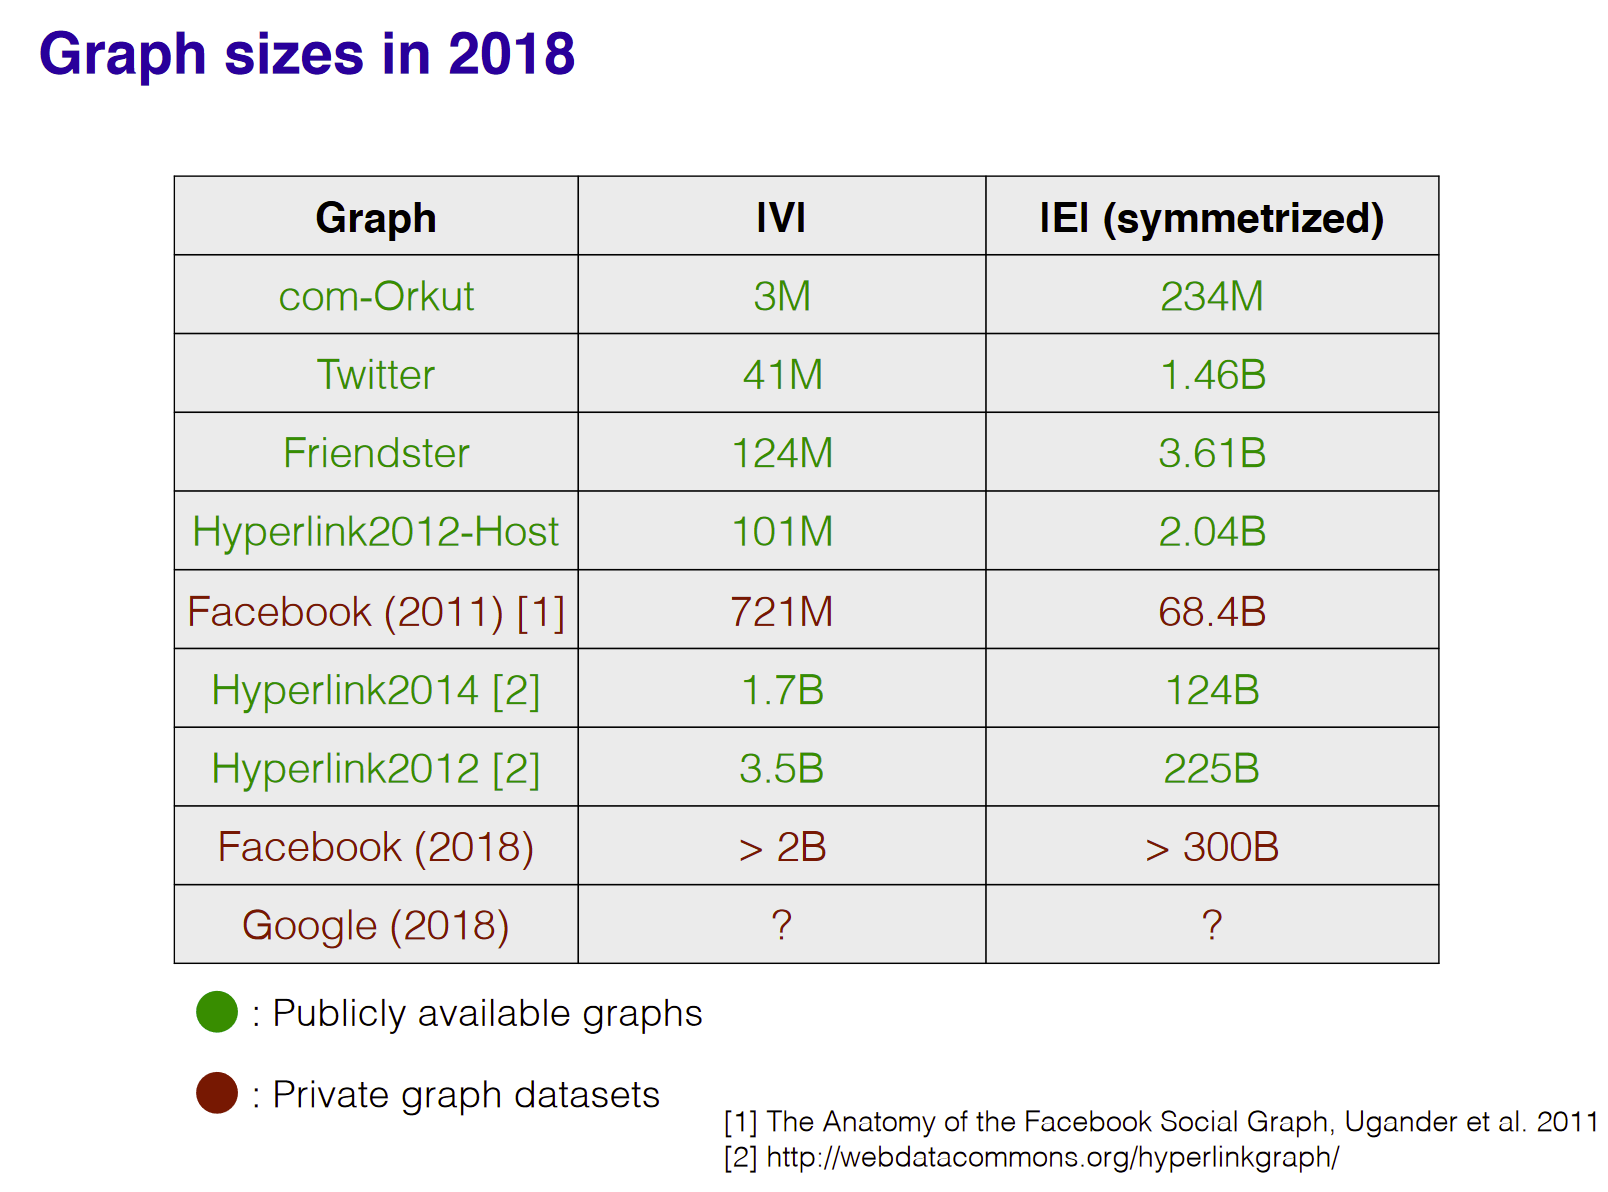
Source: [Carnegie Mellon University - Algorithms in the "Real World" Course](https://www.cs.cmu.edu/afs/cs/project/pscico-guyb/realworld/www/slidesS18/compression6.pdf)

There are many usecases where graphs of more than 1B nodes and many billions of edges need to be processed. Almost always these graphs also have weights, and node/edge metadata. This leads to sizes of the order of Terabytes that cannot be fitted within a single machine, and we need to distribute the processing to multiple nodes within a cluster, not because we need processing parallelism, but because we cannot store the graph. This leads to heavy inefficiencies due to distributed computing overhead. We need to find a way to fit these graphs within a single machine.

In delta compression, instead of storing the absolute values of the vertices or edges, we store the difference between each vertex or edge and the previous one. This can result in smaller numbers being stored, since adjacent vertices or edges are often similar.

For example, suppose we have a graph with 10 vertices and we want to store the adjacency list using delta compression. If we store the first vertex as-is, we then store the difference between the second vertex and the first vertex, the difference between the third vertex and the second vertex, and so on. Since the differences between adjacent vertices are likely to be small, we can store them using fewer bits than we would need to store the absolute values of the vertices.

Delta compression can be particularly effective for graphs with a high degree of clustering or a small diameter, where adjacent vertices or edges are likely to be similar. However, it may not be as effective for graphs with many random or uncorrelated edges, where adjacent vertices or edges are less likely to be similar. However, we are in luck.

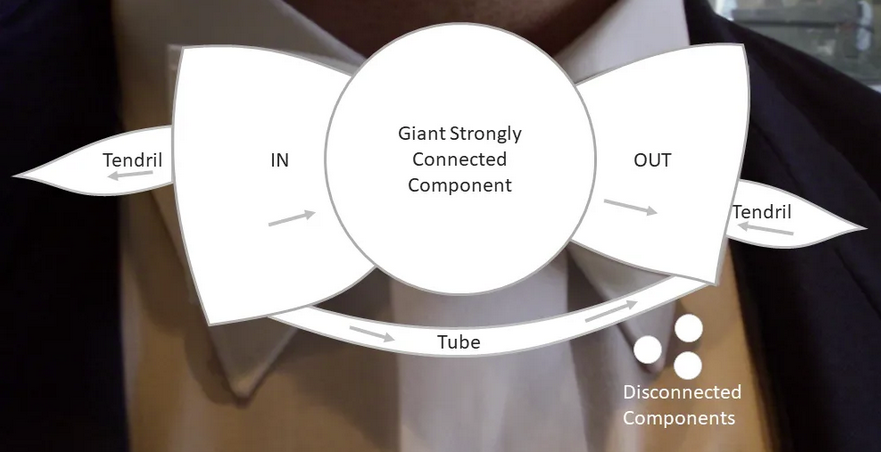

Source: [Andrei Broder - Graph structure in the Web](https://www.sciencedirect.com/science/article/abs/pii/S1389128600000839); [The world wide web is like a bow tie](https://medium.com/neo4j/the-world-wide-web-is-like-a-bow-tie-discovering-graph-structure-with-neo4j-5d1b684cd4ee)

The "bowtie" shape of the World Wide Web (WWW) is a result of the complex network structure of the web, which is characterized by a large number of interlinked web pages and websites. The bowtie shape was first described in a seminal paper by Broder et al. in 2000.

The bowtie shape is so named because the structure of the web resembles a bowtie with a thick core (or "strongly connected component"), two large "in" and "out" regions, and two smaller "tendrils" that connect to the "in" and "out" regions. The "core" represents the central part of the web that is highly connected, while the "tendrils" represent smaller subsets of the web that are less connected.

The reason for the bowtie shape of the web is due to the nature of the hyperlinks that connect web pages and websites. Hyperlinks create a directed graph, where each node represents a web page or website, and each directed edge represents a hyperlink from one page to another. This graph is highly interconnected, with many nodes having multiple incoming and outgoing edges.

The core of the bowtie represents the highly interconnected "hub" pages (*supernodes*) that link to many other pages on the web. The "in" and "out" regions represent pages that have many incoming or outgoing links, but are not necessarily highly interconnected with other pages on the web. The "tendrils" represent pages that are less connected to the rest of the web, and may be located in smaller subgraphs.

In [ ]:
def compress_graph(adj_list):
    compressed_adj_list = defaultdict(list)

    # TODO apply delta encoding on the sorted adjacency lists

    return compressed_adj_list

compressed_graph = compress_graph(adj_list)

# TODO compute the memory footprint of the resulting lists

Solution: Now we only need 8 bits to store the elements, instead of 10. We have gained a 20% improvement just through this small modification.

## Reordering
The largest delta between the two elements (called log-gap cost) is caused by the indices assigned to the nodes. If we were to re-arrange the indices in some other way, we could get bigger or smaller differences between elements in the adjacency lists. The problem of finding the optimal order for the indices is NP-Hard ([Source](https://ldhulipala.github.io/papers/RecursiveBisection.pdf)), thus we cannot hope for an optimal labeling. However, there are some simple heuristics that we can apply.

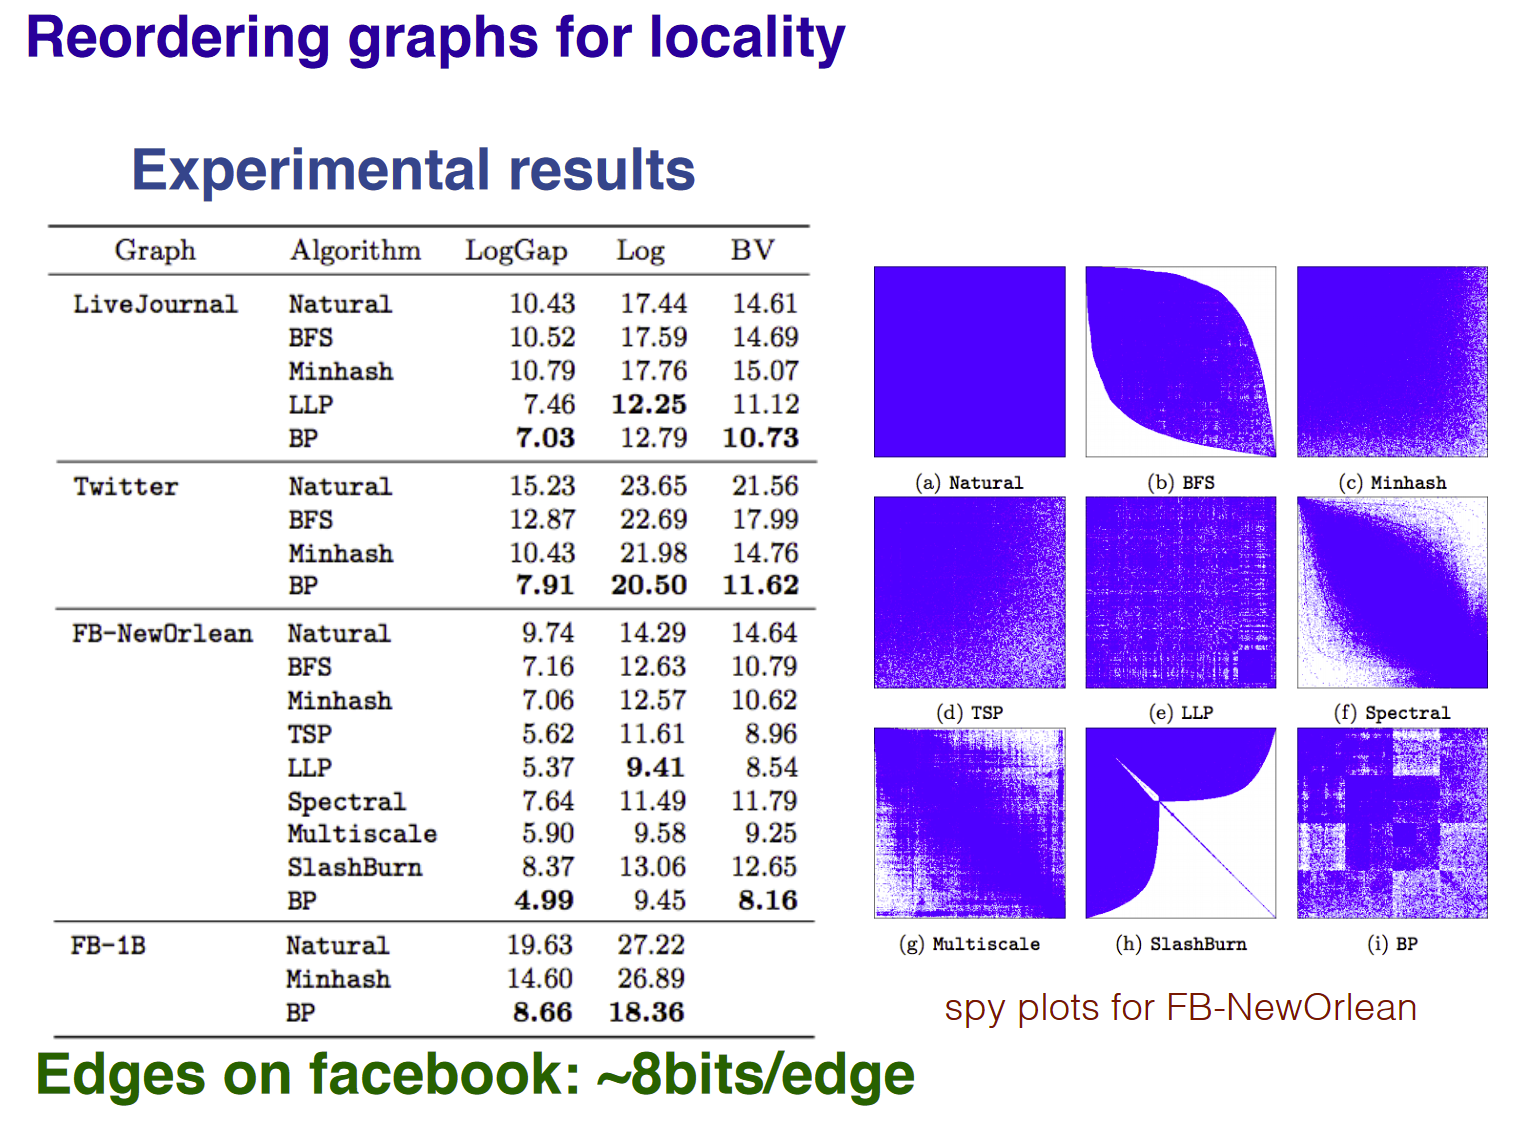

We will try to reorder the graph using a BFS, as it is the simplest to understand and implement.

The main idea is to start a BFS from a node (ideally the one with the biggest out-degree), and assign new indices to nodes as they are queued in the traversal. This way, we can naturally re-order the node indices so that nodes that are neighbours have indices closer to each other.

*Hint: You can use a `deque` or a simple array as a queue.*

In [ ]:
from collections import deque

def bfs(start_node, adj_list):
    new_indices_map = {}
    
    # TODO perform a BFS and create a mapping of old-index: new-index, assigned in the order of the traversal

    return new_indices_map

In [ ]:
def reorder_graph(start_node, adj_list):
    new_indices_map = bfs(start_node, adj_list)
    reordered_adj_list = defaultdict(list)

    # TODO recompute the adjacency lists using the new indices
    
    return reordered_adj_list

In [ ]:
# The graph was deliberately created so that node 0 is the node with the largest degree. You can try to modify this to see how the log gap changes.
start = 0

reordered_compressed_graph = compress_graph(reorder_graph(start, adj_list))

# TODO compute the memory footprint of the resulting lists

Solution: We now need only 7 bits per node, leading to ~1 400 000 bits for the entire graph.